In [24]:
import os 
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")
os.environ['HF_TOKEN'] = os.getenv("HF_TOKEN")


In [25]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [26]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing s

In [27]:
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [28]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap = 100
)
docs_splits = text_splitter.split_documents(doc_list)

vectorstore_langgraph = FAISS.from_documents(documents=docs_splits, embedding=embeddings)
retriever_langgraph = vectorstore_langgraph.as_retriever()

In [29]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool_langgraph = create_retriever_tool(
    retriever=retriever_langgraph, 
    name="retriever_vector_db_blog",
    description="Search and run information about langgraph"
)

In [30]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]
docs = [WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQ

In [31]:
docs_list = [item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)
doc_splits = text_splitter.split_documents(docs_list)

vectorstore_langchain = FAISS.from_documents(documents=doc_splits, embedding=embeddings)

retriever_langchain = vectorstore_langchain.as_retriever()

In [32]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool_langchain = create_retriever_tool(
    retriever=retriever_langchain, 
    name="retriever_vector_langchain_blog",
    description="Search and run information about Langchain"
)

In [33]:
tools = [retriever_tool_langchain, retriever_tool_langgraph]

In [34]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [35]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [36]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "hi". Just greet back. Possibly ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 72, 'total_tokens': 115, 'completion_time': 0.086963542, 'prompt_time': 0.004484643, 'queue_time': 0.055247945, 'total_time': 0.091448185}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1093f5fb-8ae3-4b85-ae0e-2019f45cd8be-0', usage_metadata={'input_tokens': 72, 'output_tokens': 43, 'total_tokens': 115})

In [37]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. 
    Given the question, it will decide to retrieve using the retriever tool, or 
    simple end.

    Args:
        state(messages): The current state
    
    Returns:
        dict: The updated state with the agent response appended to messsages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    return {"messages": [response]}


In [38]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain import hub
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field

In [39]:
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """ 
    Determines whether the retrieved documents are relevant to the questions.

    Args:
        state (messages): The current state 

    Return:
        str: A decision for whether the documents are relavent or not
    """
    print("---CHECK RELEVANCE---")
    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score:str = Field(description="Relevance score 'yes' or 'no'")

    model = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
    llm_with_tool = model.with_structured_output(grade)
    
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context}\n\n
        Here is the user question: {question}\n
        If the document contains keyword(s) or sematic meaning related to the user question, grade it as relevant.\n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relavant to the question.""",
        input_variables=["context", "question"]
    )

    chain = prompt | llm_with_tool
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context":docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("--DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [40]:
def generate(state):
    """ 
    Generate answer

    Args:
        state(messages): The current state
    
    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")
    model = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [41]:
def rewrite(state):
    """ 
    Transform the query to produce a better question.

    Args:
        state(messages): The current state
    Return:
        dict: The updated state with re-phrased question
    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            conten=f"""\n 
            Look at the input and try to reason about the underlying sematic intent / meaning. \ng
            here is the initial quesion:
            \n-----\n
            {question}
            \n-----/n
            Formulate an improvied question:
                    """
        )
    ]

    model = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
    response = model.invoke(msg)
    return {"messages": [response]}

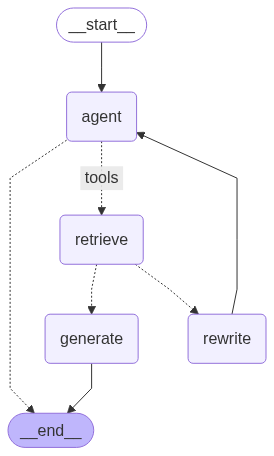

In [42]:
from langgraph.graph import END, START, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

workflow = StateGraph(AgentState)

workflow.add_node("agent", agent)
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)
workflow.add_node("rewrite", rewrite)
workflow.add_node(
    "generate", generate
)
workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    }
)

workflow.add_conditional_edges(
    "retrieve",
    grade_documents
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
graph.invoke({"messages":"what is langgraph"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='what is langgraph', additional_kwargs={}, response_metadata={}, id='69493eff-2f31-404b-b9dc-1053db3eb6c9'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to answer: what is LangGraph? Likely a library for building stateful workflows on top of LangChain, enabling graph-based LLM applications. Provide explanation, features, use cases, architecture, example code. Might need to browse for up-to-date info. Use function to retrieve info about langgraph.', 'tool_calls': [{'id': 'fc_2d4b9615-2a4d-4c93-b58b-a84b3e4ed271', 'function': {'arguments': '{"query":"LangGraph library description"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 171, 'total_tokens': 270, 'completion_time': 0.196570362, 'prompt_time': 0.006935054, 'queue_time': 0.052586894, 'total_time': 0.203505416}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e10890